# WorldCoin Price Analysis and Prediction

### Import Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import  RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR


### Data Exploration

In [2]:
df = pd.read_csv("worldcoin-org_2023-07-24_2024-09-20.csv")
df.head()

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-09-19,2024-09-20,200.230327,212.106582,198.374500,205.695640,7.132699e+10,9.150957e+10
1,2024-09-18,2024-09-19,188.305880,199.477624,184.037433,199.477624,4.713701e+10,8.460954e+10
2,2024-09-17,2024-09-18,182.005667,189.902632,179.929701,187.779677,4.191690e+10,8.099784e+10
3,2024-09-16,2024-09-17,189.331293,189.331293,178.401239,182.249198,5.452660e+10,7.791811e+10
4,2024-09-15,2024-09-16,194.384816,201.122540,188.887849,189.929580,4.570792e+10,8.292824e+10


### Data cleaning

In [3]:
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

In [4]:
df

,Start,End,Open,High,Low,Close,Volume,Market Cap
0,2024-09-19,2024-09-20,200.230327,212.106582,198.374500,205.695640,7.132699e+10,9.150957e+10
1,2024-09-18,2024-09-19,188.305880,199.477624,184.037433,199.477624,4.713701e+10,8.460954e+10
2,2024-09-17,2024-09-18,182.005667,189.902632,179.929701,187.779677,4.191690e+10,8.099784e+10
3,2024-09-16,2024-09-17,189.331293,189.331293,178.401239,182.249198,5.452660e+10,7.791811e+10
4,2024-09-15,2024-09-16,194.384816,201.122540,188.887849,189.929580,4.570792e+10,8.292824e+10
...,...,...,...,...,...,...,...,...
419,2023-07-28,2023-07-29,266.303801,286.533403,264.554328,285.644185,6.007178e+10,2.919856e+10
420,2023-07-27,2023-07-28,287.676920,295.834139,268.693036,269.989743,9.477407e+10,2.970630e+10
421,2023-07-26,2023-07-27,293.852710,321.444574,282.445740,289.173453,1.894057e+11,3.163373e+10
422,2023-07-25,2023-07-26,278.619394,309.644293,245.956788,293.075495,1.737368e+11,2.890207e+10


In [5]:
df.describe()

,Start,End,Open,High,Low,Close,Volume,Market Cap
count,424,424,424.000000,424.000000,424.000000,424.000000,4.240000e+02,4.240000e+02
mean,2024-02-20 12:00:00,2024-02-21 12:00:00,422.287500,446.349520,401.010156,422.242953,8.737347e+10,7.107264e+10
min,2023-07-24 00:00:00,2023-07-25 00:00:00,129.619325,133.331179,125.152690,129.415215,1.123129e+10,1.693024e+10
25%,2023-11-06 18:00:00,2023-11-07 18:00:00,218.517456,230.820458,210.090993,217.130127,3.674172e+10,3.102822e+10
50%,2024-02-20 12:00:00,2024-02-21 12:00:00,308.464743,323.966392,297.653284,307.904462,5.844040e+10,4.796545e+10
75%,2024-06-05 06:00:00,2024-06-06 06:00:00,595.976495,618.266430,559.790348,597.448441,9.734026e+10,1.185528e+11
max,2024-09-19 00:00:00,2024-09-20 00:00:00,1498.359952,1512.852501,1209.552481,1487.117949,6.083079e+11,1.928213e+11
std,NaN,NaN,281.727724,300.963429,263.341215,281.658838,9.200615e+10,4.957433e+10


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 424 entries, 0 to 423
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Start       424 non-null    datetime64[ns]
 1   End         424 non-null    datetime64[ns]
 2   Open        424 non-null    float64       
 3   High        424 non-null    float64       
 4   Low         424 non-null    float64       
 5   Close       424 non-null    float64       
 6   Volume      424 non-null    float64       
 7   Market Cap  424 non-null    float64       
dtypes: datetime64[ns](2), float64(6)
memory usage: 26.6 KB


### EDA

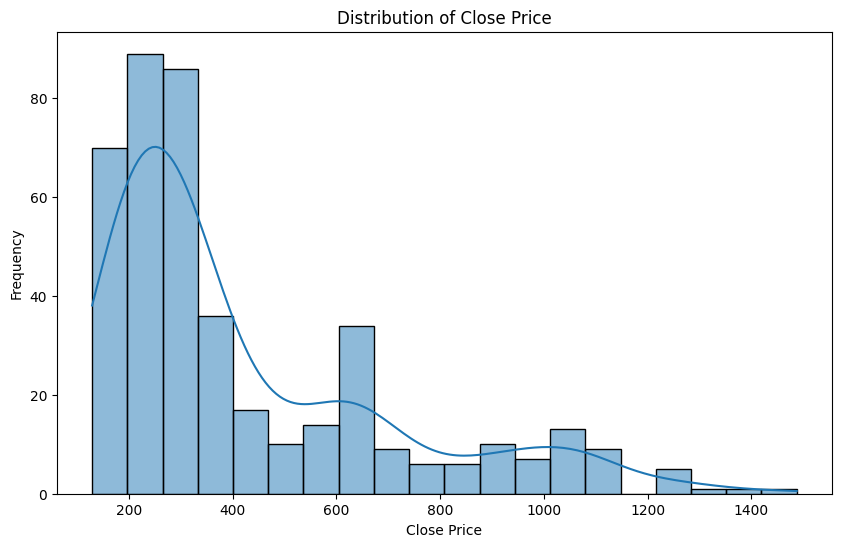

In [7]:
# Plot the distribution of the target variable 'Close'
plt.figure(figsize=(10, 6))
sns.histplot(df['Close'], bins=20, kde=True)
plt.title('Distribution of Close Price')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

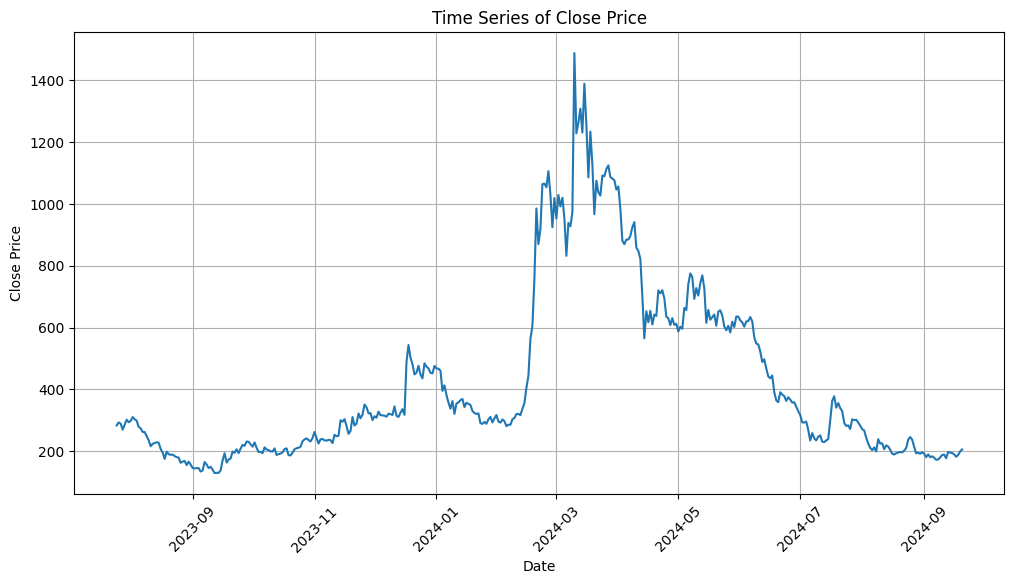

In [8]:
# Plot time series of 'Close' price
plt.figure(figsize=(12, 6))
plt.plot(df['End'], df['Close'], linestyle='-')
plt.title('Time Series of Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

### Model Development

In [9]:
X = df[["Open", "High", "Low", "Volume", "Market Cap"]]
y = df["Close"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:

model = RandomForestRegressor(random_state=42)

model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [11]:

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)

print("Mean Squared Error:",mse)

Mean Squared Error: 1613.57430106812


In [12]:

# Initialize the models
linear_reg_model = LinearRegression()
gradient_boosting_model = GradientBoostingRegressor(random_state=42)
svr_model = SVR()

# Train the models
linear_reg_model.fit(X_train, y_train)
gradient_boosting_model.fit(X_train, y_train)
svr_model.fit(X_train, y_train)

# Make predictions
linear_reg_predictions = linear_reg_model.predict(X_test)
gradient_boosting_predictions = gradient_boosting_model.predict(X_test)
svr_predictions = svr_model.predict(X_test)

# Evaluate the models
linear_reg_mse = mean_squared_error(y_test, linear_reg_predictions)
gradient_boosting_mse = mean_squared_error(y_test, gradient_boosting_predictions)
svr_mse = mean_squared_error(y_test, svr_predictions)

print("Linear Regression Mean Squared Error:", linear_reg_mse)
print("Gradient Boosting Mean Squared Error:", gradient_boosting_mse)
print("Support Vector Regressor Mean Squared Error:", svr_mse)


Linear Regression Mean Squared Error: 393.37691787908096
Gradient Boosting Mean Squared Error: 946.916061800974
Support Vector Regressor Mean Squared Error: 69349.34224291543


### Testing the models

In [13]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = model.predict(input_df)
print("Predicted Close Price:", prediction)


Please provide input for the trained model:


ValueError: could not convert string to float: ''

In [ ]:
# Request input for the trained model
print("Please provide input for the trained model:")
open_price = float(input("Enter the opening price: "))
high_price = float(input("Enter the highest price: "))
low_price = float(input("Enter the lowest price: "))
volume = float(input("Enter the volume: "))
market_cap = float(input("Enter the market cap: "))

# Create a DataFrame with the input data
input_data = {
    "Open": [open_price],
    "High": [high_price],
    "Low": [low_price],
    "Volume": [volume],
    "Market Cap": [market_cap]
}

input_df = pd.DataFrame(input_data)

# Make prediction using the trained model
prediction = linear_reg_model.predict(input_df)
print("Predicted Close Price:", prediction)
